### Installing and Importing necessary libraries

In [2]:
!pip install xgboost
#!pip install cython
#!pip install scipy
#pip install ucimlrepo
#!pip install yellowbrick

In [701]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
import yellowbrick
import warnings
warnings.filterwarnings("ignore")
import os
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay


### Fetching the Dataset from UCI

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 

#storing the variables data to attributes
attributes = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables 

  
# metadata 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 

metadata = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.variables


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

#### Saving the original datasets

In [193]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/obesityclassprediction/data/rawdata", "original_features_data.csv")

# Save the features dataframe x as a CSV file
X.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/obesityclassprediction/data/rawdata", "original_targets_data.csv")

# Save the targets dataframe y as a CSV file
y.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/obesityclassprediction/data/rawdata", "original_data_attributes.csv")

# Save the attributes dataframe y as a CSV file
attributes.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

### Exploratory Data Analysis, Data Pre-Processing and Feature Engineering

In [196]:
# Checking the first 5 rows of X
X.head() 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [198]:
# Checking the first 5 rows of y
y.head()

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


In [200]:
# Checking the shape of X & y
X.shape, y.shape

((2111, 16), (2111, 1))

In [206]:
# Joining or merging X & y into df
df = X.join(y)

In [208]:
# Checking the first 5 rows of df
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Saving the original merged data

In [210]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/obesityclassprediction/data/processeddata", "original_merged_data.csv")

# Save the df dataframe as a CSV file
df.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

In [212]:
# Exploring Information on df using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [214]:
# Checking the key statistical measures of numerical columns of df
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [216]:
# Checking for null values in df
df.isnull().sum()/len(df) * 100

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

In [218]:
# Checking the distribution of the target variable
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [226]:
# Define a folder to save visualizations
visuals_folder = "C:/Users/nikde/Documents/UpGrad/obesityclassprediction/visuals"

#### Plotting the distribution of the target variable

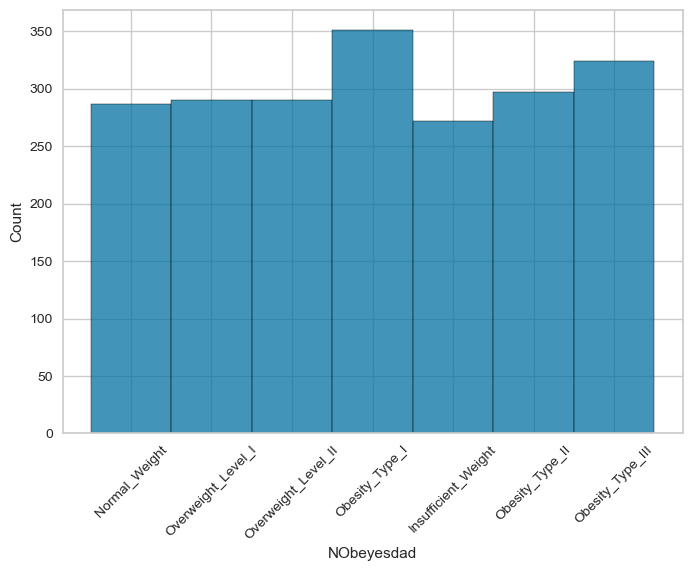

In [229]:
sns.histplot(df['NObeyesdad'])
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees (you can adjust the angle)
# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Distribution of target variable.png"))
plt.show()

#### The Target Variable is quite evenly distributed

#### Plotting Histograms for Categorical Variables with respect to the target variable

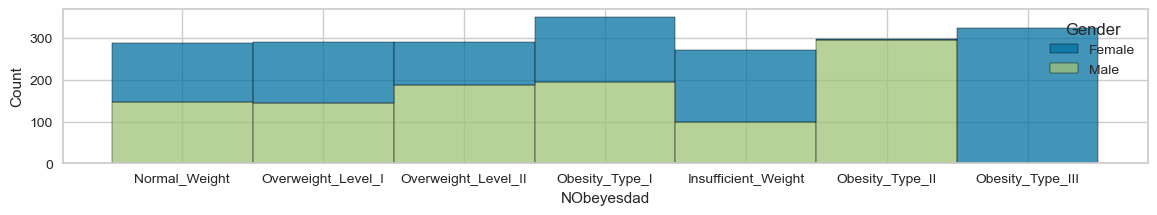

In [233]:
plt.figure(figsize=(14,2))
sns.histplot(data=df, x ='NObeyesdad', hue='Gender', multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "gender wise distribution of obesity class.png"))
plt.show()

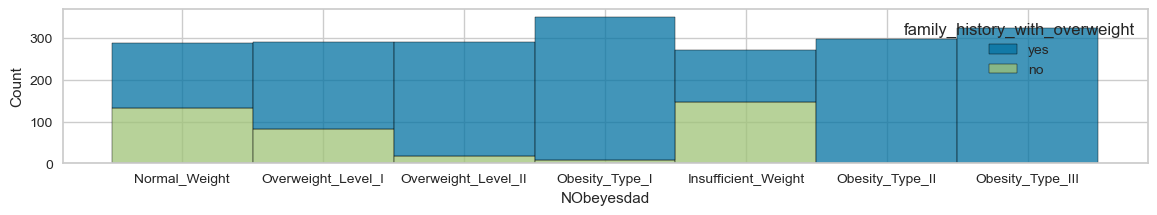

In [235]:
plt.figure(figsize=(14,2))
sns.histplot(data=df, x ='NObeyesdad', hue='family_history_with_overweight', multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "distribution of obesity class by family overweight history.png"))
plt.show()

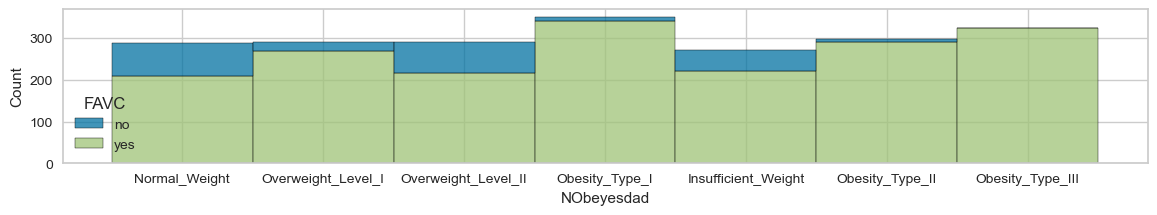

In [237]:
plt.figure(figsize=(14,2))
sns.histplot(data=df, x ='NObeyesdad', hue='FAVC', multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Distribution of obesity class by FAVC.png"))
plt.show()

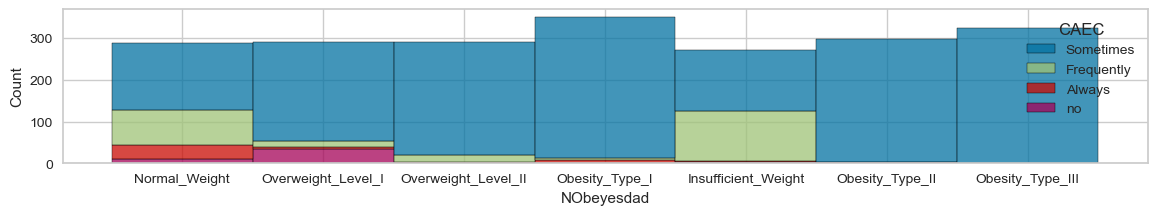

In [239]:
plt.figure(figsize=(14,2))
sns.histplot(data=df, x ='NObeyesdad', hue='CAEC', multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Distribution of obesity class by CAEC.png"))
plt.show()

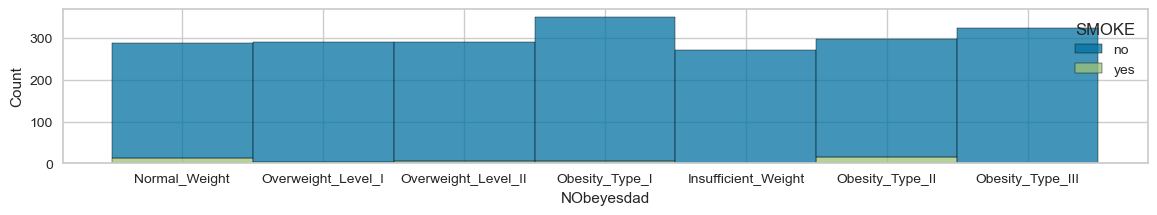

In [241]:
plt.figure(figsize=(14,2))
sns.histplot(data=df, x ='NObeyesdad', hue='SMOKE', multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Distribution of obesity class by Smoking.png"))
plt.show()

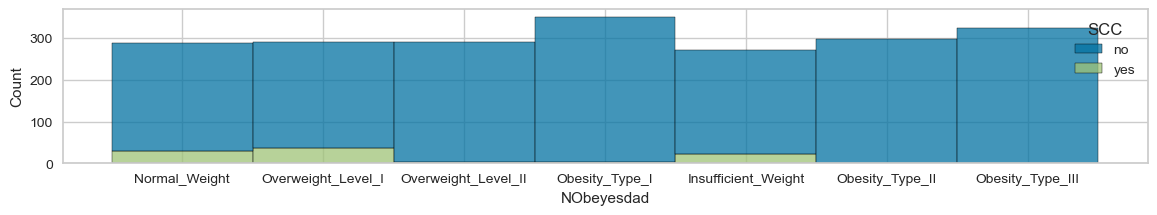

In [243]:
plt.figure(figsize=(14,2))
sns.histplot(data=df, x ='NObeyesdad', hue='SCC', multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Distribution of obesity class by SCC.png"))
plt.show()

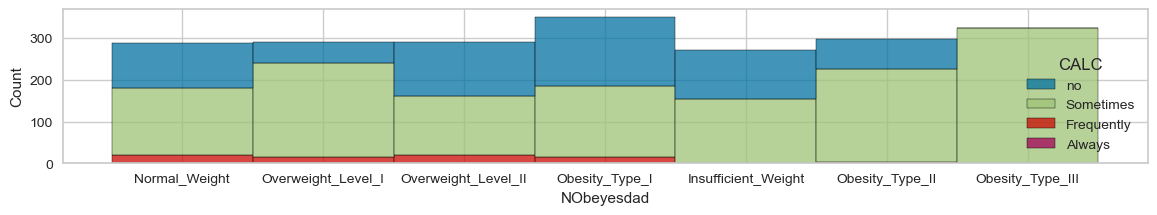

In [245]:
plt.figure(figsize=(14,2))
sns.histplot(data=df, x ='NObeyesdad', hue='CALC', multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Distribution of obesity class by CALC.png"))
plt.show()

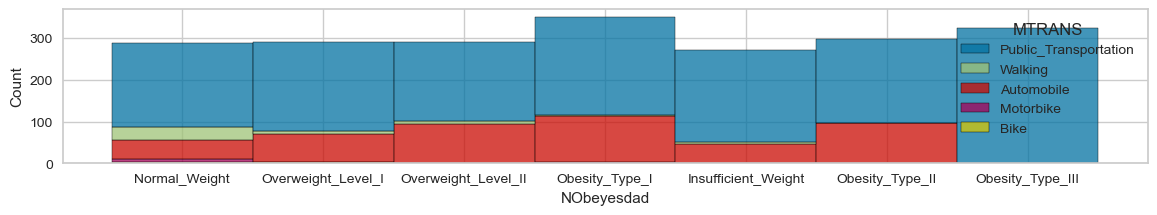

In [247]:
plt.figure(figsize=(14,2))
sns.histplot(data=df, x ='NObeyesdad', hue='MTRANS', multiple='stack')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Distribution of obesity class by MTRANS.png"))
plt.show()

#### Plotting Histograms of numerical varaibles to check the distribution

In [250]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

#### Plotting histograms for all numerical varaibles in one plot

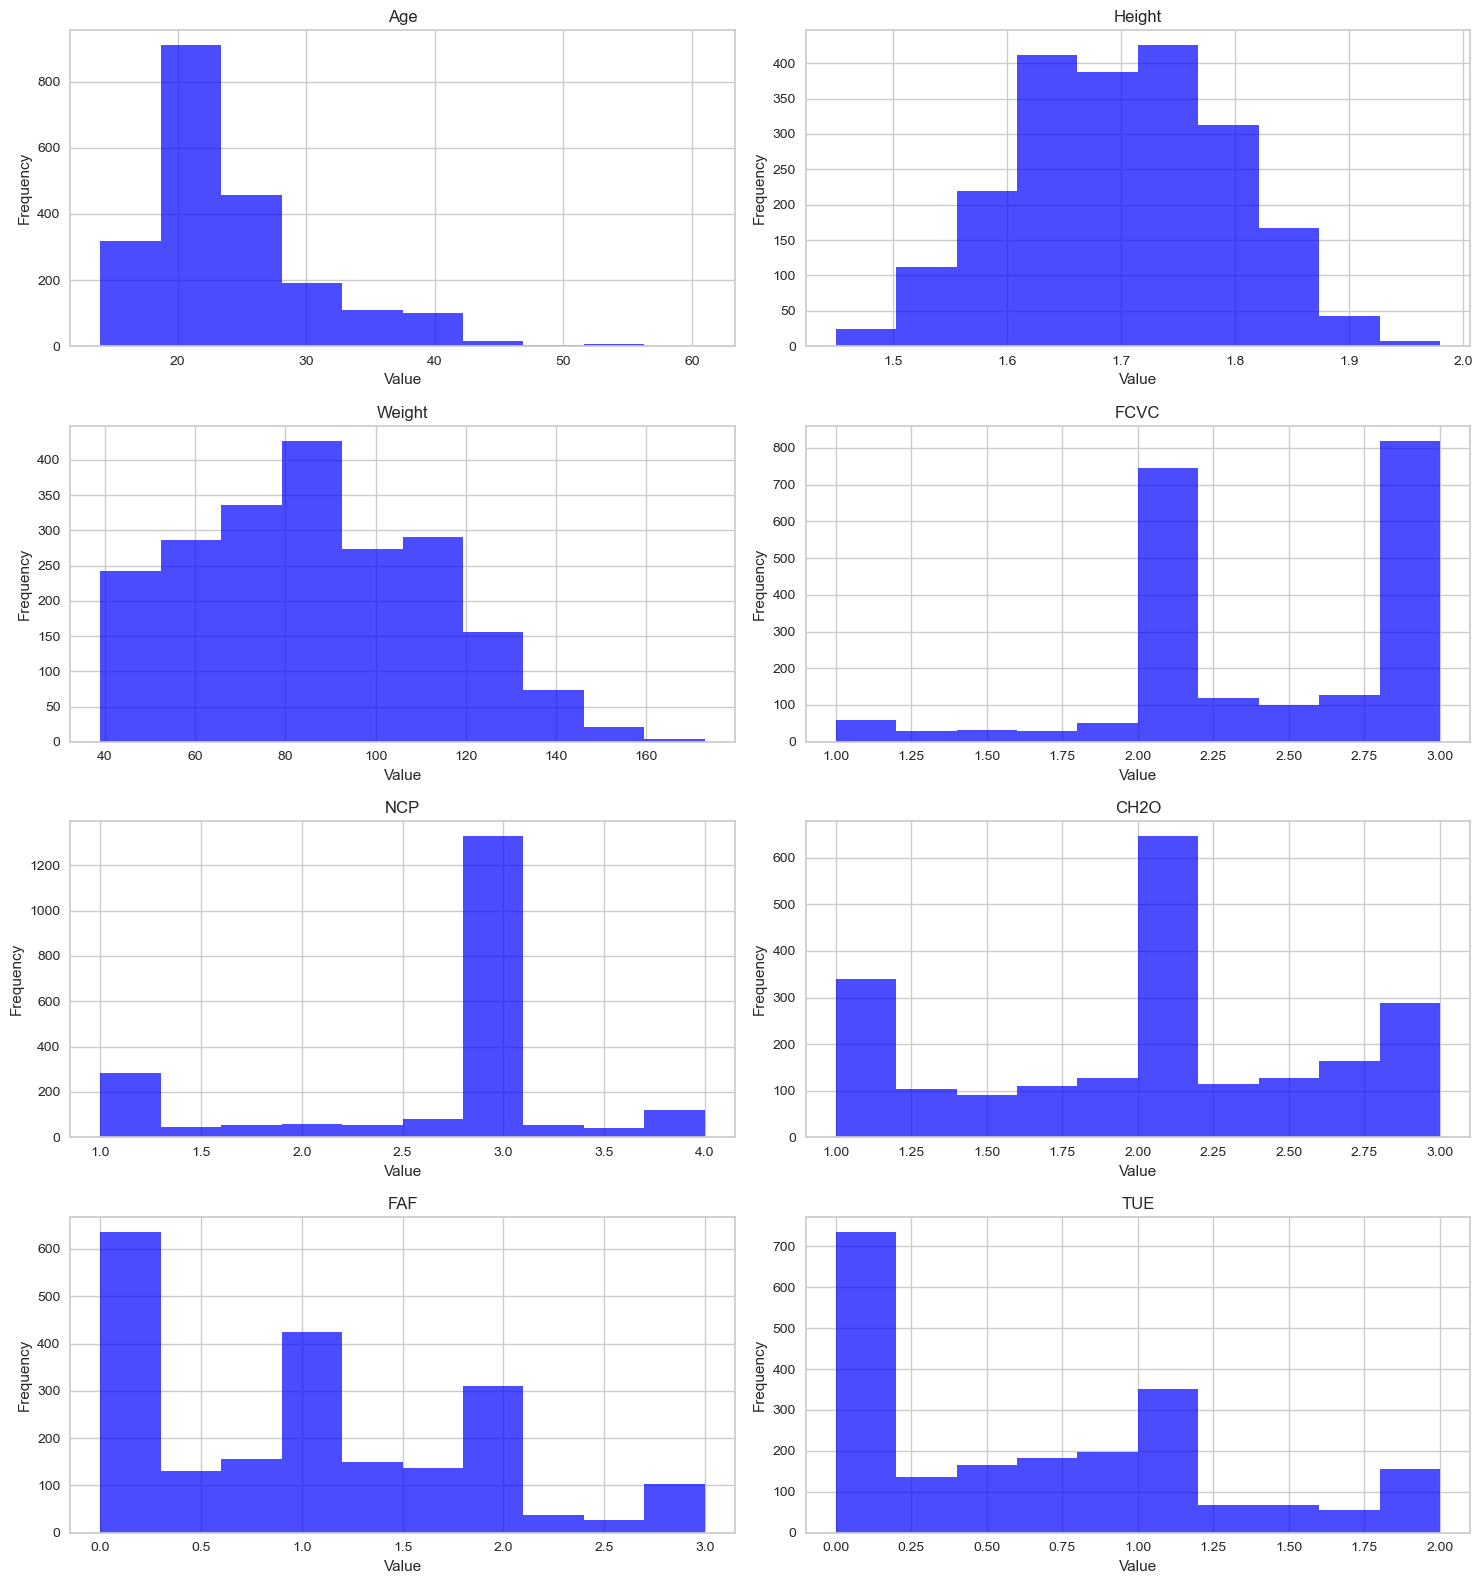

In [253]:
# Define the number of subplots (adjust grid size based on the number of features)
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Number of rows, rounded up

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust size as needed
axes = axes.flatten()  # Flatten in case axes is 2D for easy iteration

# Plot each numerical column as a histogram
for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=10, color='blue', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    
 # Save each subplot individually
    plt.savefig((os.path.join(visuals_folder, "Initial_Distribution_of_{col}.png")))

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

#### None of the columns are perfectly normallly distributed

#### Plotting Box Plots for all numerical variables to detect outlier distribution

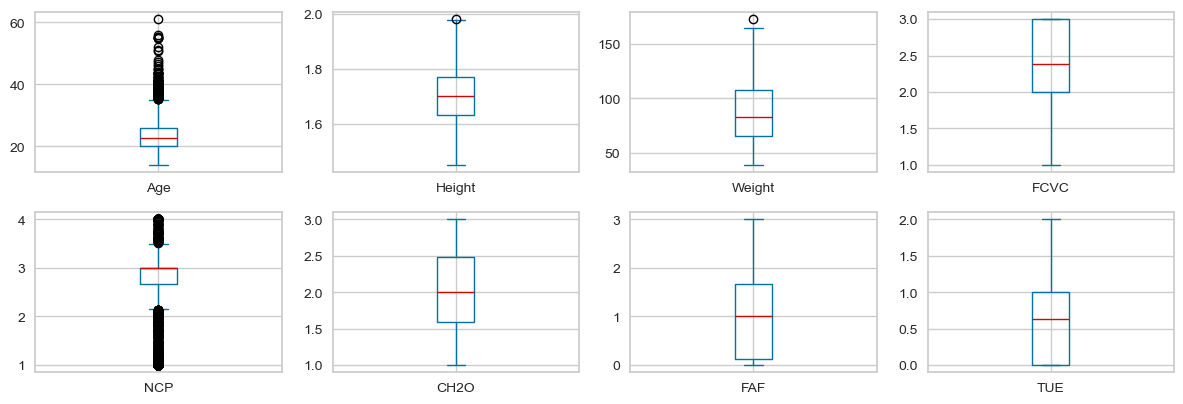

In [257]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12, 8))
plt.tight_layout()
# Save the entire figure with all subplots as a single image
plt.savefig(os.path.join(visuals_folder, "initial_boxplots.png"))
plt.show()

#### Columns Age and NCP have many outliers

In [260]:
# Creating a copy of df
df_copy = df.copy()

In [262]:
# Converting NCP to a categorical column due to problematic distribution of outliers
# as most of the patients have 3 meals in a day 
df['NCP'] = df['NCP'].astype('category')

In [264]:
# Obtaining the numerical columns after converting NCP to a categorical variable
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [266]:
# checking the numerical columns
df[numerical_cols]

,Age,Height,Weight,FCVC,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,2.852339,1.139107,0.586035


#### Detecting and Removing Outliers

In [269]:
# Function to identify and remove rows with outliers based on IQR
def outlier_treatment(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    condition = ~((dataframe < (Q1 - 1.5*IQR)) | (dataframe > (Q3 + 1.5*IQR))).any(axis=1)
    return condition  # Return the boolean condition for rows without outliers


In [271]:
# Call the function and filter the dataframe
condition = outlier_treatment(df[numerical_cols])

In [273]:
# checking condition
condition

0       True
1       True
2       True
3       True
4       True
        ... 
2106    True
2107    True
2108    True
2109    True
2110    True
Length: 2111, dtype: bool

In [275]:
# Keep only the rows that do not have outliers in any numerical columns
df_clean = df[condition].reset_index(drop=True)

In [277]:
# checking df_clean
df_clean

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
1937,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
1938,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
1939,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [279]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/obesityclassprediction/data/processeddata", "outlier_eliminated_merged_data.csv")

# Save the df dataframe as a CSV file
df_clean.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

In [281]:
# checking df_clean for nulls
df_clean[numerical_cols].isna().sum()/len(df) * 100

Age       0.0
Height    0.0
Weight    0.0
FCVC      0.0
CH2O      0.0
FAF       0.0
TUE       0.0
dtype: float64

#### Plotting histograms for all numerical varaibles after outlier removal in one plot

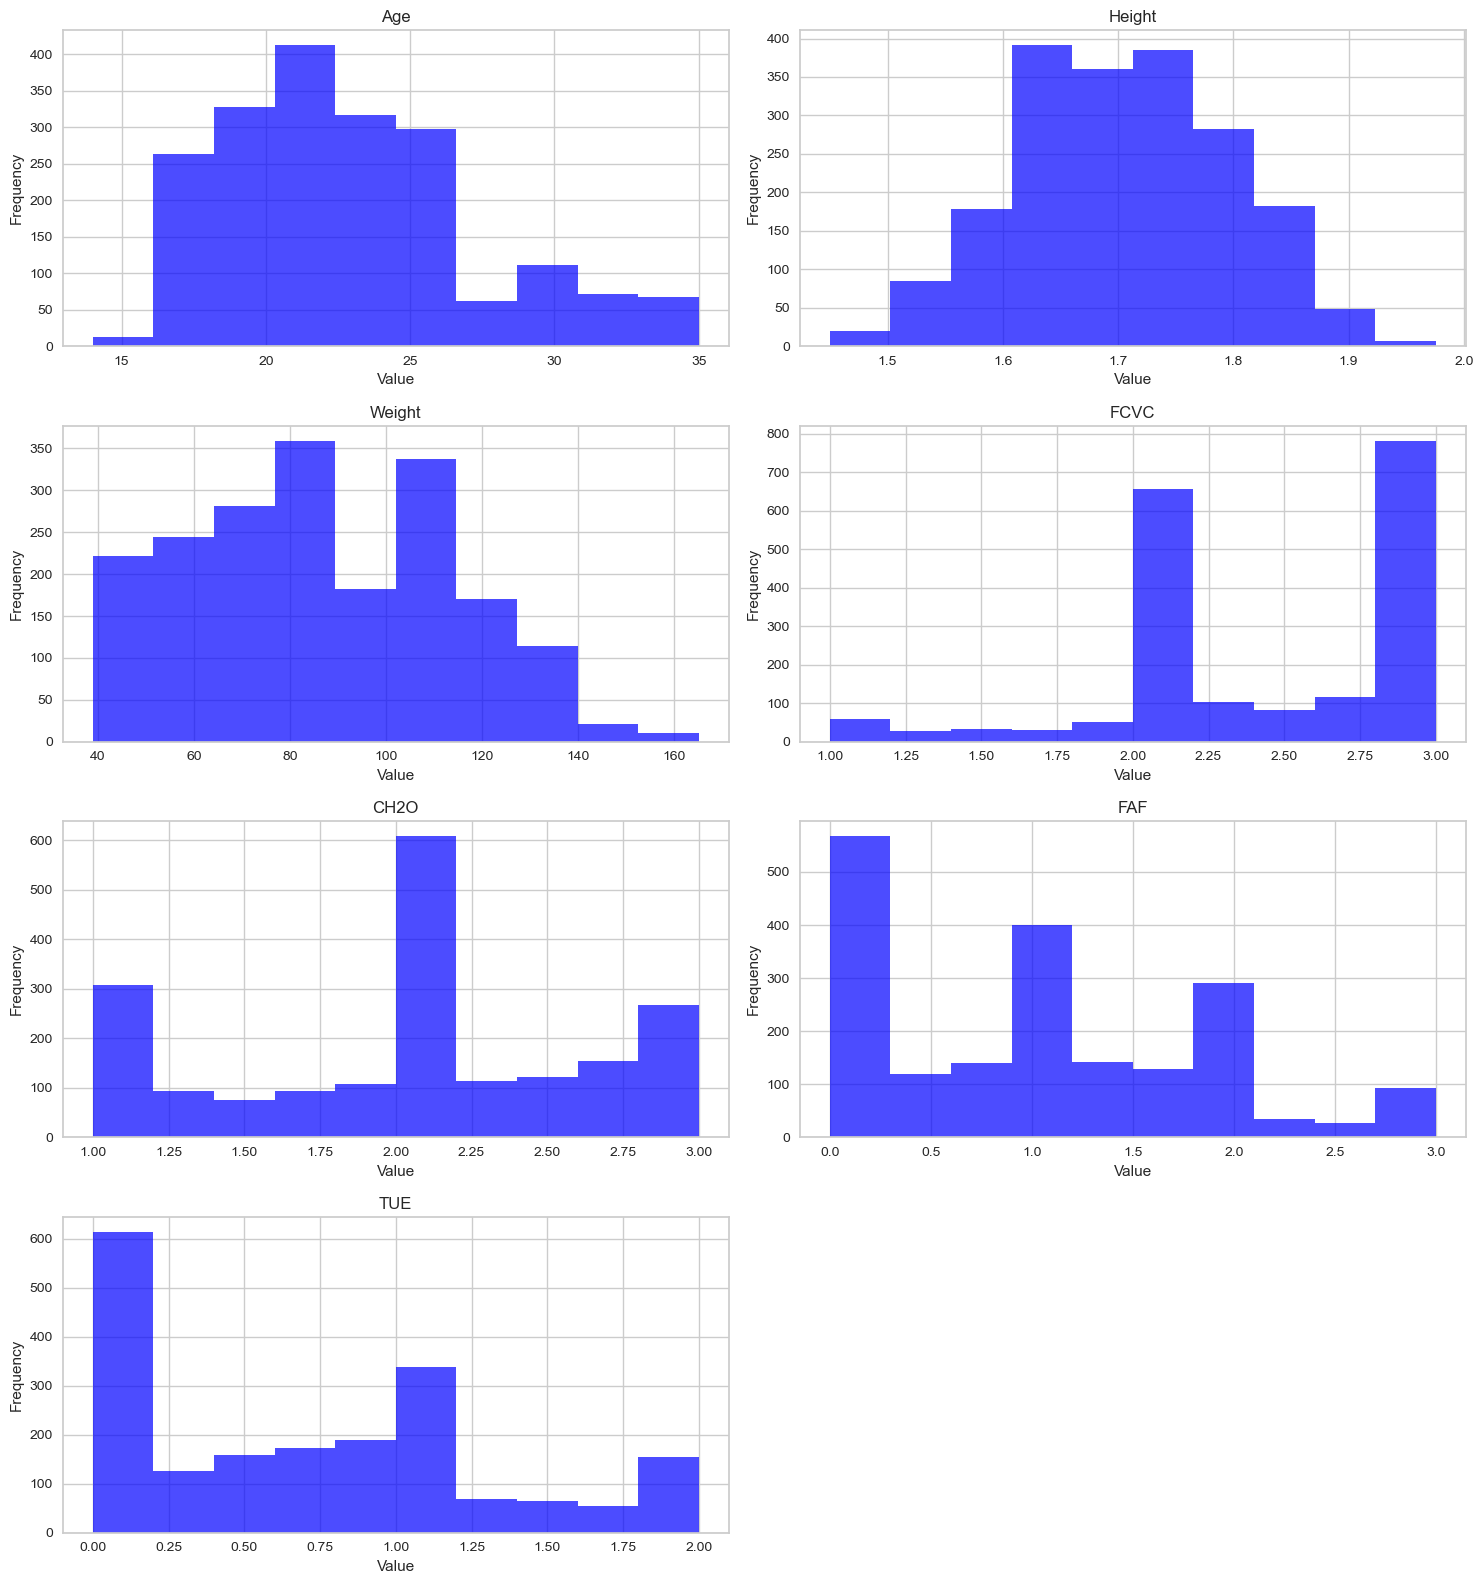

In [284]:
# Define the number of subplots (adjust grid size based on the number of features)
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Number of rows, rounded up

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust size as needed
axes = axes.flatten()  # Flatten in case axes is 2D for easy iteration

# Plot each numerical column as a histogram
for i, col in enumerate(numerical_cols):
    axes[i].hist(df_clean[col], bins=10, color='blue', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    
    # Save each subplot individually
    plt.savefig((os.path.join(visuals_folder, "Final_Distribution_of_{col}.png")))

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

#### Plotting Box Plots for all numerical variables after outlier removal to detect outlier distribution

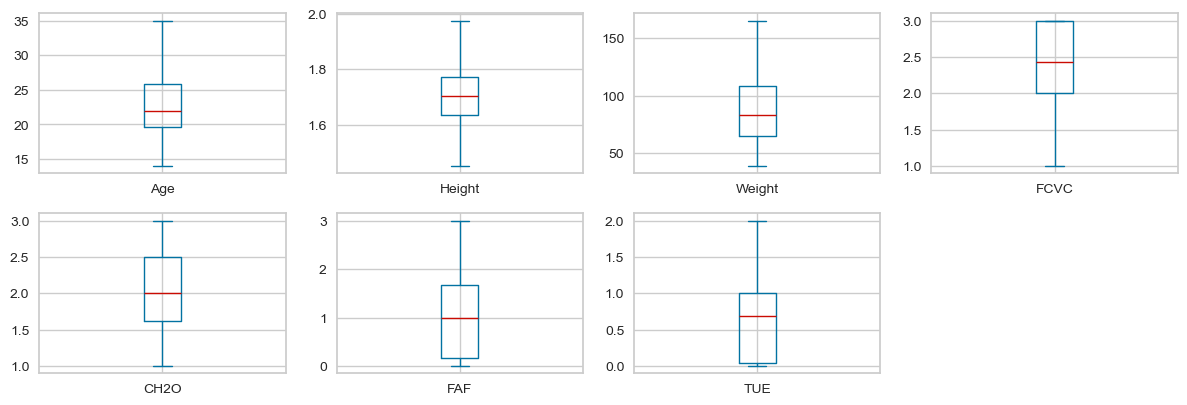

In [287]:
df_clean.plot(kind='box', subplots=True, layout=(4,4), figsize=(12, 8))
plt.tight_layout()
# Save the entire figure with all subplots as a single image
plt.savefig(os.path.join(visuals_folder, "final_boxplots.png"))
plt.show()

#### Now we can see that there are no more outliers

In [290]:
# checking df_clean
df_clean

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
1937,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
1938,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
1939,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [292]:
# Defining a function for separating the numerical and categorical columns

def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64' or dataset[i].dtype == 'int8' or dataset[i].dtype == 'int16':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

In [294]:
# Obtaining the numerical and categorical column lists by calling the data_type function defined above
numerical, categorical = data_type(df_clean)

In [296]:
# checking the numerical columns
numerical

['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']

In [298]:
# checking the categorical columns
categorical

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [300]:
# Defining a function to encode the categorical columns
def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes #This returns the underlying integer codes for the categories in a categorical column. Each unique category is assigned an integer, starting from 0.
    return dataset

In [302]:
# Obtaining the encoded dataset by calling the encoding function using df_clean & categorical
dataset = encoding(df_clean, categorical)

In [304]:
# checking dataset after encoding the categorical features
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,477,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,477,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,477,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,477,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,0,2,0,2.0,0,0.0,0.0,2,3,6


In [306]:
# calling the data_type function again to update the numerical & categorical lists after encoding
numerical, categorical = data_type(dataset)

In [308]:
# chekcing numerical columns
numerical

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [310]:
# checking categorical columns
categorical

[]

In [312]:
# obtaining information on dataset using info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1941 non-null   int8   
 1   Age                             1941 non-null   float64
 2   Height                          1941 non-null   float64
 3   Weight                          1941 non-null   float64
 4   family_history_with_overweight  1941 non-null   int8   
 5   FAVC                            1941 non-null   int8   
 6   FCVC                            1941 non-null   float64
 7   NCP                             1941 non-null   int16  
 8   CAEC                            1941 non-null   int8   
 9   SMOKE                           1941 non-null   int8   
 10  CH2O                            1941 non-null   float64
 11  SCC                             1941 non-null   int8   
 12  FAF                             19

In [314]:
# Defining a function to separate binary columns from numerical columns
def binary_columns(dataset):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in dataset.select_dtypes(include=['int8', 'int16', 'float64']).columns:
        unique_values = dataset[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols


In [316]:
# obtaining the binary columns by calling the binary_columns function
binary_cols = binary_columns(dataset)

In [318]:
# Removing the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

In [320]:
# checking the binary columns
binary_cols

['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

In [322]:
# re-checking the numerical columns
numerical

['Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CAEC',
 'CH2O',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [324]:
# removing the target column 'NObeyesdad' from numerical columns as we have converted it to categorical and 
# don't need to scale it's values
for col in numerical:
    if col == 'NObeyesdad':
        numerical.remove(col)

In [326]:
# re-checking the numerical columns
numerical

['Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CAEC',
 'CH2O',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS']

In [328]:
# Defining a function for scaling the numerical features 
def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset


In [330]:
# Calling the feature_scaling function and re-assigning the results to dataset
dataset = feature_scaling(dataset, numerical)

In [332]:
# checking the dataset after scaling the numerical features
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.452698,-0.923367,-0.843096,1,0,-0.782336,0.479573,0.301442,0,-0.030311,0,-1.211882,0.500956,1.442164,0.401961,1
1,0,-0.452698,-2.009152,-1.141720,1,0,1.055157,0.479573,0.301442,1,1.605265,1,2.336013,-1.142413,-0.531912,0.401961,1
2,1,0.011934,1.031045,-0.357831,1,0,-0.782336,0.479573,0.301442,0,-0.030311,0,1.153381,0.500956,-2.505989,0.401961,1
3,1,0.941199,1.031045,0.015449,0,0,1.055157,0.479573,0.301442,0,-0.030311,0,1.153381,-1.142413,-2.505989,1.299782,5
4,1,-0.220382,0.813888,0.119968,0,0,-0.782336,-2.169591,0.301442,0,-0.030311,0,-1.211882,-1.142413,-0.531912,0.401961,6


#### Plotting a heat map using the correlation matrix for visualizing the co-relation between all the features 

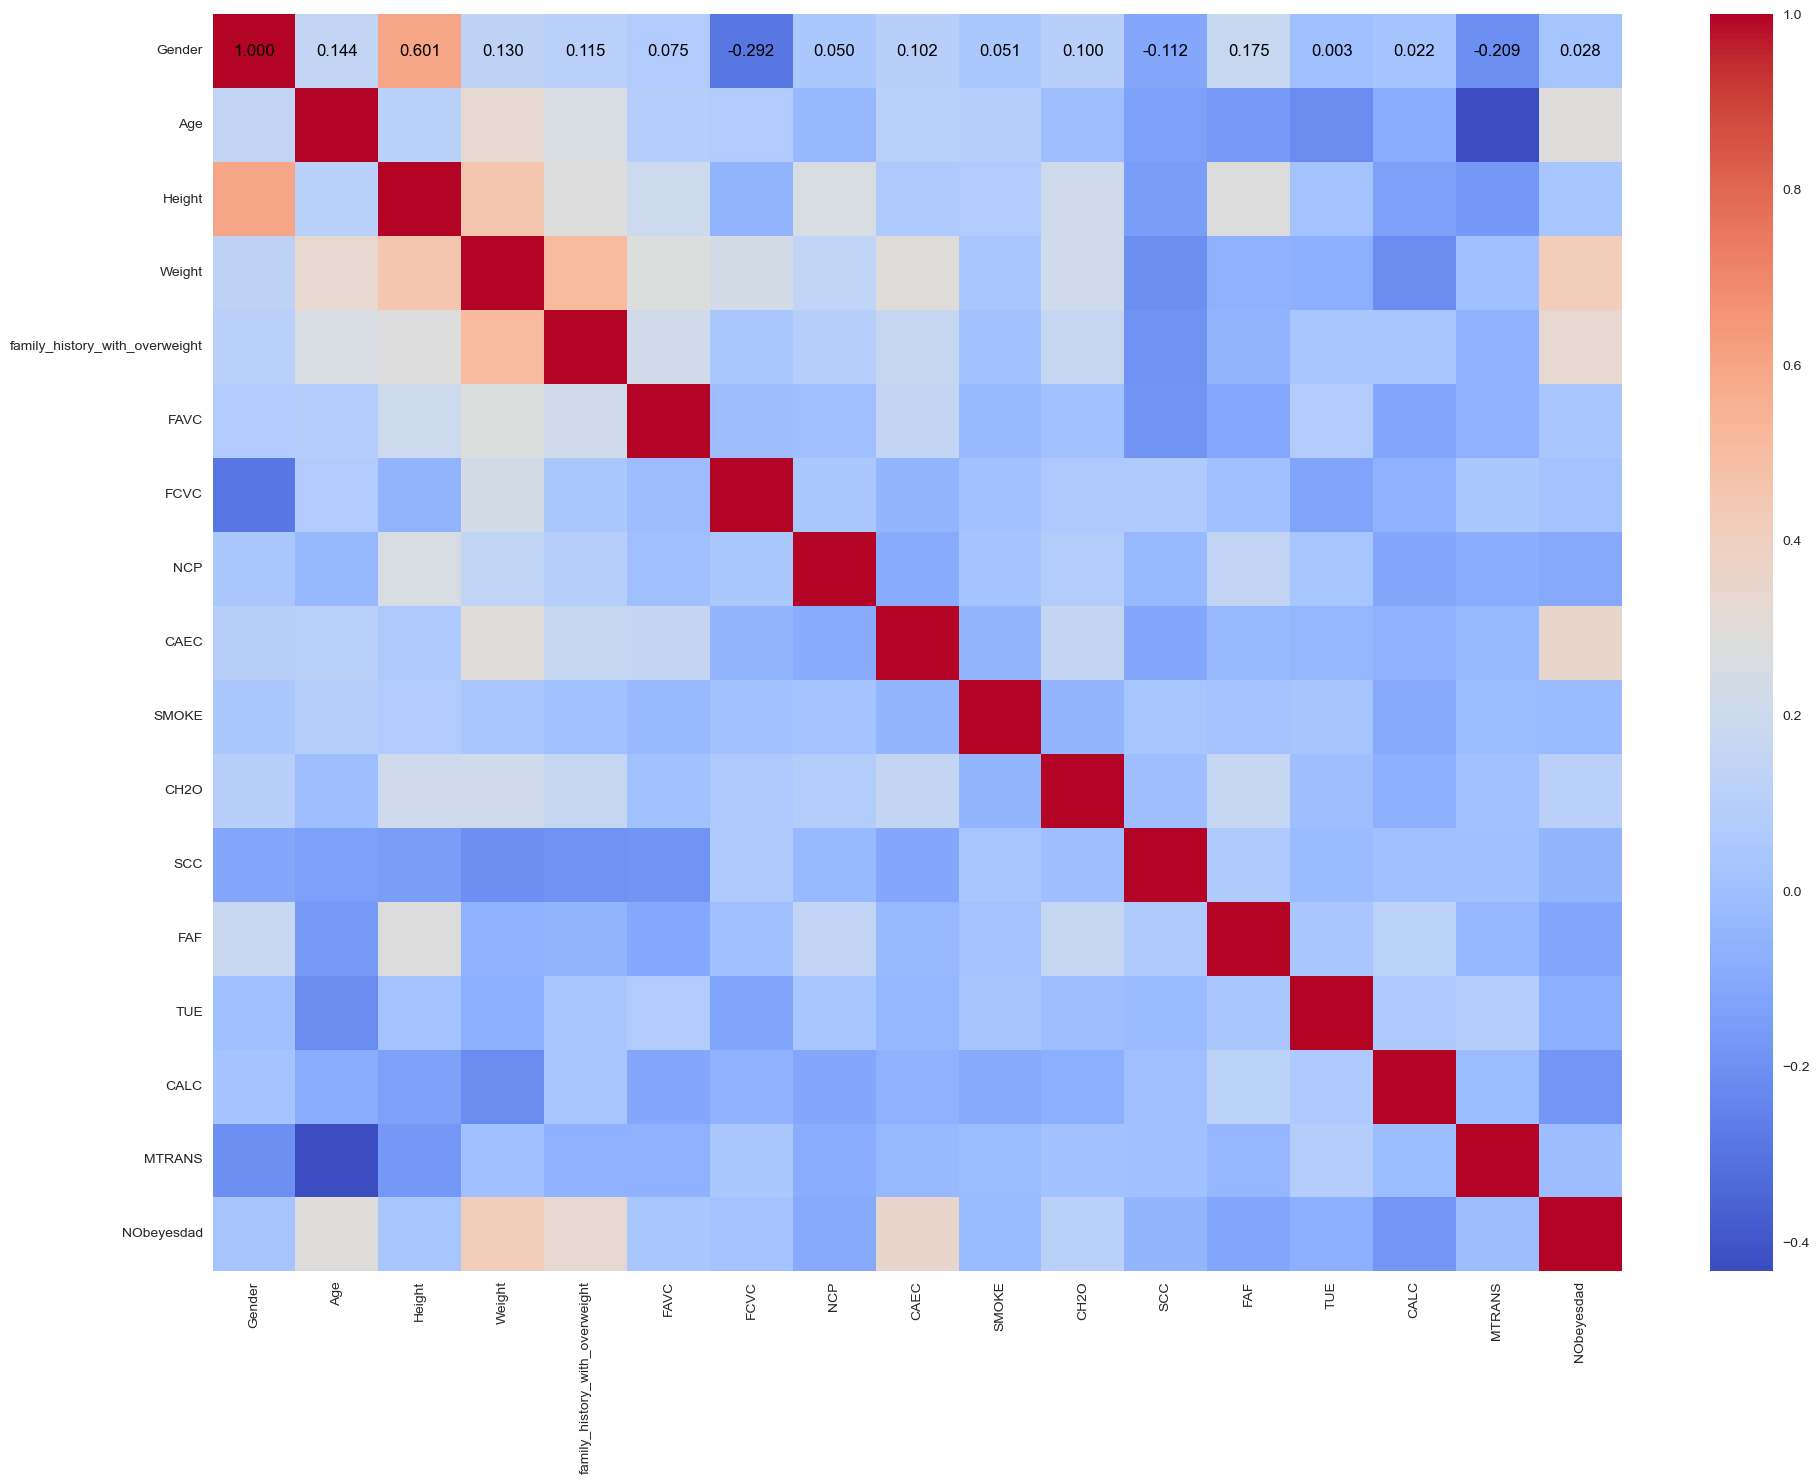

In [709]:
plt.figure(figsize=(20, 15))
sns.heatmap(dataset.corr(), annot=True, fmt=".3f", cmap = "coolwarm", annot_kws={"color": "black"})
# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Co-realtion Matrix.png"))
plt.tight_layout() 
plt.show()

#### Since none of the features are highly co-related with each other we need to keep all the features

### Model Training and Evaluation

#### Creating the score-card and defining a function to update it with important perfromance metric¶

In [346]:
# create an empty dataframe to store the scores for various algorithms
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','f1 Score'])

# append the result table for all performance scores

def update_score_card(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = pd.concat([score_card,pd.DataFrame([{'model_name':model_name,
                                    'Accuracy Score' : accuracy_score(y_test, y_pred),
                                    'Precision Score': precision_score(y_test, y_pred, average="weighted"),
                                    'Recall Score': recall_score(y_test, y_pred, average="weighted"),
                                    'f1 Score': f1_score(y_test, y_pred, average="weighted")}])],
                                    ignore_index = True)

In [348]:
# Separate features (X) and target (y)
X = dataset.drop(columns=['NObeyesdad'])  
y = dataset['NObeyesdad']

In [350]:
# checking the shape of X & y
X.shape, y.shape

((1941, 16), (1941,))

In [352]:
# checking information of y
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1941 entries, 0 to 1940
Series name: NObeyesdad
Non-Null Count  Dtype
--------------  -----
1941 non-null   int8 
dtypes: int8(1)
memory usage: 2.0 KB


#### Performing train test split

In [355]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [357]:
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1552, 16)
y_train (1552,)
X_test (389, 16)
y_test (389,)


#### A] Random Forest Classifier

In [360]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

##### Accuracy

In [363]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9588688946015425


##### Classification Report

In [366]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.85      0.93      0.89        55
           2       0.98      0.98      0.98        54
           3       1.00      0.97      0.98        62
           4       0.98      1.00      0.99        65
           5       0.91      0.93      0.92        44
           6       1.00      0.96      0.98        51

    accuracy                           0.96       389
   macro avg       0.96      0.96      0.96       389
weighted avg       0.96      0.96      0.96       389



##### Confusion Matrix

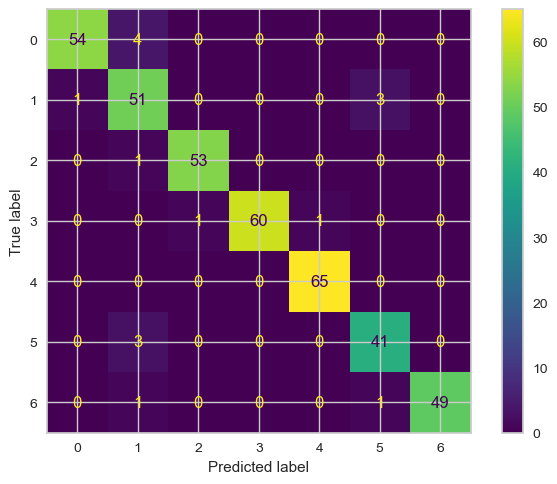

In [369]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "InitialRF_Confusion_Matrix.png"))
plt.show()

##### Training Accuracy

In [372]:
train_accuracy = rf_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


##### Cross Validation Score

In [375]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.75578406 0.98969072 0.98195876 0.98195876 0.98195876]
Mean CV Score: 0.9382702144011873


In [377]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test,y_pred,'Initial_RF_model')

#### Feature Importances

In [380]:
# Extracting the feature importances
importances = rf_model.feature_importances_
# Storing the feature importances as a Series
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Display the feature importances
print(feature_importances)

Weight                            0.339838
Height                            0.100782
FCVC                              0.093558
Age                               0.092664
Gender                            0.055958
NCP                               0.052665
TUE                               0.046997
CH2O                              0.043959
FAF                               0.038414
family_history_with_overweight    0.031982
CAEC                              0.031719
CALC                              0.030837
MTRANS                            0.016740
FAVC                              0.014627
SCC                               0.007654
SMOKE                             0.001606
dtype: float64


##### Plotting a bar chart for Feature Importances 

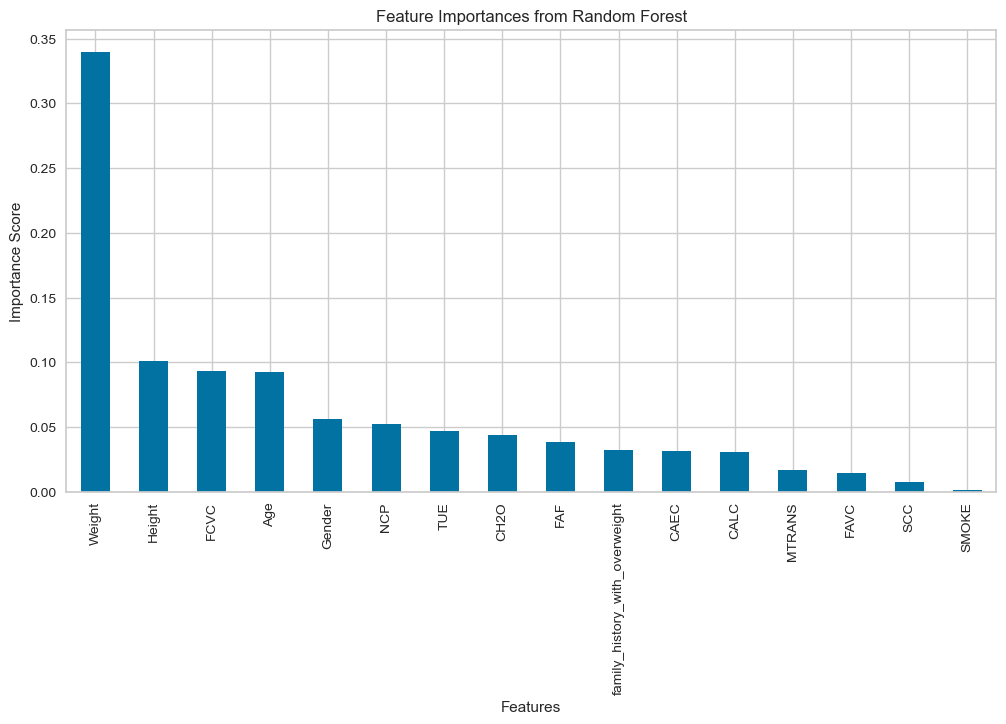

In [383]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Feature Importances from Random Forest.png"))
plt.show()


In [385]:
# Set the number of top features to keep
n_top_features = 12  # Change this to however many features you want to keep

# Get the top n most important features
top_features = feature_importances.index[:n_top_features]

# Filter the original dataframe (X) to include only the top n features
X_top_features = X[top_features]

# Now you can proceed with this filtered X for further training
print(X_top_features.head())

     Weight    Height      FCVC       Age  Gender       NCP       TUE  \
0 -0.843096 -0.923367 -0.782336 -0.452698       0  0.479573  0.500956   
1 -1.141720 -2.009152  1.055157 -0.452698       0  0.479573 -1.142413   
2 -0.357831  1.031045 -0.782336  0.011934       1  0.479573  0.500956   
3  0.015449  1.031045  1.055157  0.941199       1  0.479573 -1.142413   
4  0.119968  0.813888 -0.782336 -0.220382       1 -2.169591 -1.142413   

       CH2O       FAF  family_history_with_overweight      CAEC      CALC  
0 -0.030311 -1.211882                               1  0.301442  1.442164  
1  1.605265  2.336013                               1  0.301442 -0.531912  
2 -0.030311  1.153381                               1  0.301442 -2.505989  
3 -0.030311  1.153381                               0  0.301442 -2.505989  
4 -0.030311 -1.211882                               0  0.301442 -0.531912  


In [387]:
X_top_features

,Weight,Height,FCVC,Age,Gender,NCP,TUE,CH2O,FAF,family_history_with_overweight,CAEC,CALC
0,-0.843096,-0.923367,-0.782336,-0.452698,0,0.479573,0.500956,-0.030311,-1.211882,1,0.301442,1.442164
1,-1.141720,-2.009152,1.055157,-0.452698,0,0.479573,-1.142413,1.605265,2.336013,1,0.301442,-0.531912
2,-0.357831,1.031045,-0.782336,0.011934,1,0.479573,0.500956,-0.030311,1.153381,1,0.301442,-2.505989
3,0.015449,1.031045,1.055157,0.941199,1,0.479573,-1.142413,-0.030311,1.153381,0,0.301442,-2.505989
4,0.119968,0.813888,-0.782336,-0.220382,1,-2.169591,-1.142413,-0.030311,-1.211882,0,0.301442,-0.531912
...,...,...,...,...,...,...,...,...,...,...,...,...
1936,1.673133,0.061765,1.055157,-0.458078,0,0.479573,0.346885,-0.474960,0.770527,1,0.301442,-0.531912
1937,1.760272,0.472778,1.055157,-0.224345,0,0.479573,-0.157592,-0.021921,0.374488,1,0.301442,-0.531912
1938,1.758272,0.512105,1.055157,-0.098640,0,0.479573,-0.080324,0.058326,0.460606,1,0.301442,-0.531912
1939,1.745479,0.373602,1.055157,0.328334,0,0.479573,-0.179342,1.363754,0.135262,1,0.301442,-0.531912


In [389]:
y

0       1
1       1
2       1
3       5
4       6
       ..
1936    4
1937    4
1938    4
1939    4
1940    4
Name: NObeyesdad, Length: 1941, dtype: int8

In [391]:
# Joining X_top_features and y 
fe_dataset = X_top_features.join(y) 

In [393]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/obesityclassprediction/data/processeddata", "feature_selected_data.csv")

# Save the df dataframe as a CSV file
fe_dataset.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

In [395]:
# Split data into 80% training and 20% testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

In [397]:
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train2.shape)
print('y_train', y_train2.shape)

# print dimension of test set
print('X_test', X_test2.shape)
print('y_test', y_test2.shape)

X_train (1552, 12)
y_train (1552,)
X_test (389, 12)
y_test (389,)


#### A] Random Forest Classifier

In [400]:
# Initialize the Random Forest model
rf_model_fs = RandomForestClassifier(random_state=42)

# Train the model
rf_model_fs.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = rf_model_fs.predict(X_test2)


##### Accuracy

In [403]:
# printing the accuracy score
print("Accuracy:", accuracy_score(y_test2, y_pred2))

Accuracy: 0.9511568123393316


##### Classification Report

In [406]:
# printing the Classification Report
print("Classification Report:\n", classification_report(y_test2, y_pred2))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.93      0.88        55
           2       0.98      0.98      0.98        54
           3       1.00      0.97      0.98        62
           4       0.98      1.00      0.99        65
           5       0.87      0.93      0.90        44
           6       1.00      0.90      0.95        51

    accuracy                           0.95       389
   macro avg       0.95      0.95      0.95       389
weighted avg       0.95      0.95      0.95       389



##### Confusion Matrix

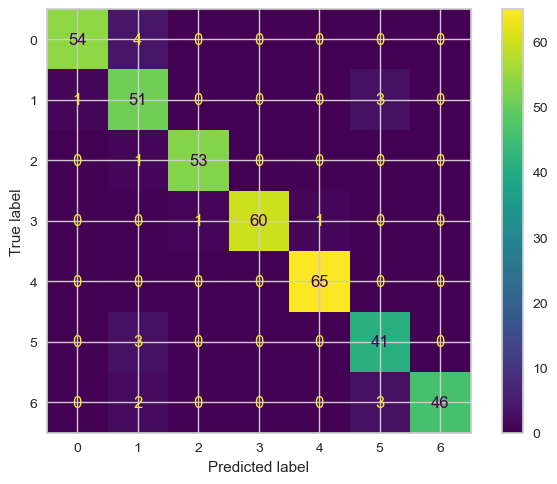

In [409]:
# Compute the confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2, labels=rf_model_fs.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rf_model_fs.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "RF_Confusion_Matrix after Feature Selection.png"))
plt.show()

##### Training Accuracy

In [412]:
train_accuracy = rf_model_fs.score(X_train2, y_train2)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


##### Cross Validation score

In [415]:
cv_scores2 = cross_val_score(rf_model_fs, X_top_features, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.75578406 0.98969072 0.98195876 0.98195876 0.98195876]
Mean CV Score: 0.9382702144011873


In [417]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test2,y_pred2,'FeatureSelected_RF_model')

#### B] K-Neighbors Classifier

In [420]:
from sklearn.neighbors import KNeighborsClassifier

In [422]:
# Initialize the KNeighbors Classifier model
knn = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [424]:
# Make predictions on the test set
y_predknn = knn.predict(X_test)

##### Accuracy

In [427]:
# printing the accuracy
print("Accuracy:", accuracy_score(y_test, y_predknn))

Accuracy: 0.8046272493573264


##### Classification Report

In [430]:
print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        58
           1       0.69      0.33      0.44        55
           2       0.82      0.83      0.83        54
           3       0.91      0.95      0.93        62
           4       0.98      1.00      0.99        65
           5       0.62      0.80      0.70        44
           6       0.84      0.73      0.78        51

    accuracy                           0.80       389
   macro avg       0.80      0.79      0.78       389
weighted avg       0.81      0.80      0.79       389



##### Confusion Matrix

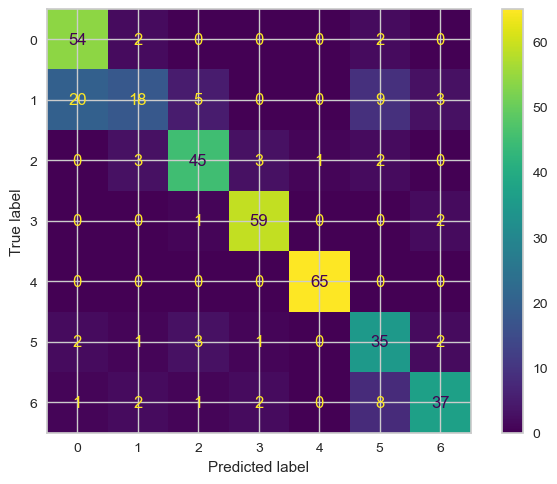

In [433]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predknn, labels=knn.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Initial_KNN_Confusion_Matrix.png"))
plt.show()

##### Cross Validation Score

In [436]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.69151671 0.85309278 0.8685567  0.84020619 0.85309278]
Mean CV Score: 0.8212930326239631


In [438]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test,y_predknn,'Initial_KNN_model')

##### Training and evaluating using the Feature selected datset

In [441]:
# Initialize the KNeighborsClassifier model
knn_model_fs = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model_fs.fit(X_train2, y_train2)

# Make predictions on the test set
y_predknn2 = knn_model_fs.predict(X_test2)

##### Accuracy

In [444]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test2, y_predknn2))

Accuracy: 0.794344473007712


##### Classification Report

In [447]:
print(classification_report(y_test2, y_predknn2))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        58
           1       0.68      0.35      0.46        55
           2       0.74      0.85      0.79        54
           3       0.97      0.97      0.97        62
           4       0.98      1.00      0.99        65
           5       0.61      0.75      0.67        44
           6       0.80      0.63      0.70        51

    accuracy                           0.79       389
   macro avg       0.78      0.78      0.77       389
weighted avg       0.80      0.79      0.78       389



##### Confusion Matrix

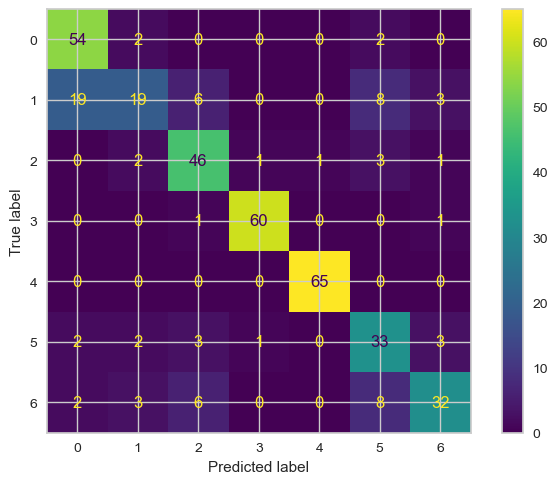

In [450]:
# Compute the confusion matrix
cm = confusion_matrix(y_test2, y_predknn2, labels=knn.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "KNN_Confusion_Matrix_after_Feature_Selection.png"))
plt.show()

In [452]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test2,y_predknn2,'FeatureSelected_KNN_model')

### Performing Hyper-parameter tuning

In [455]:
from sklearn.model_selection import GridSearchCV

In [457]:
# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [459]:
# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [461]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [463]:
# Get the best parameters and best score
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print(f"Best accuracy score: {grid_search.best_score_ * 100:.2f}%")

Best parameters found by GridSearchCV:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best accuracy score: 87.56%


In [465]:
# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
y_predknn_tuned = best_knn.predict(X_test)

##### Accuracy

In [468]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_predknn_tuned))

Accuracy: 0.8663239074550129


##### Classification Report

In [471]:
print(classification_report(y_test, y_predknn_tuned))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        58
           1       0.78      0.51      0.62        55
           2       0.91      0.91      0.91        54
           3       0.94      0.95      0.94        62
           4       0.98      1.00      0.99        65
           5       0.73      0.86      0.79        44
           6       0.84      0.90      0.87        51

    accuracy                           0.87       389
   macro avg       0.86      0.86      0.85       389
weighted avg       0.87      0.87      0.86       389



##### Confusion Matrix

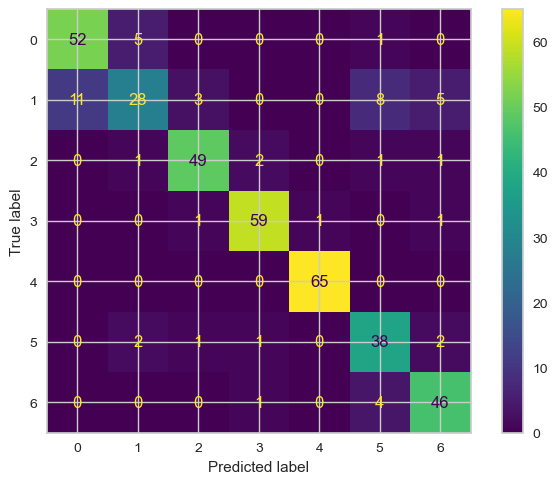

In [474]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predknn_tuned, labels=rf_model.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Best_Tuned_KNN_Confusion_Matrix.png"))
plt.show()

##### Cross Validation Score

In [477]:
cv_scores = cross_val_score(best_knn, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.75064267 0.90721649 0.91237113 0.90721649 0.92268041]
Mean CV Score: 0.8800254419208651


In [479]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test,y_predknn_tuned,'BestTuned_KNN_model')

##### Performing hyperparameter tuning using the feature selected dataset

In [482]:
# Initialize GridSearchCV
grid_search2 = GridSearchCV(knn_model_fs, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [484]:
# Fit the model
grid_search2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [486]:
# Get the best parameters and best score
print("Best parameters found by GridSearchCV:")
print(grid_search2.best_params_)
print(f"Best accuracy score: {grid_search2.best_score_ * 100:.2f}%")

Best parameters found by GridSearchCV:
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best accuracy score: 88.27%


In [488]:
# Evaluate the best model on the test set
best_knn2 = grid_search2.best_estimator_
y_predknn_tuned2 = best_knn2.predict(X_test2)

##### Accuracy

In [491]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test2, y_predknn_tuned2))

Accuracy: 0.87146529562982


##### Classification Report

In [494]:
print(classification_report(y_test2, y_predknn_tuned2))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        58
           1       0.80      0.58      0.67        55
           2       0.84      0.94      0.89        54
           3       0.97      0.97      0.97        62
           4       1.00      1.00      1.00        65
           5       0.72      0.82      0.77        44
           6       0.82      0.80      0.81        51

    accuracy                           0.87       389
   macro avg       0.86      0.86      0.86       389
weighted avg       0.87      0.87      0.87       389



##### Confusion Matrix

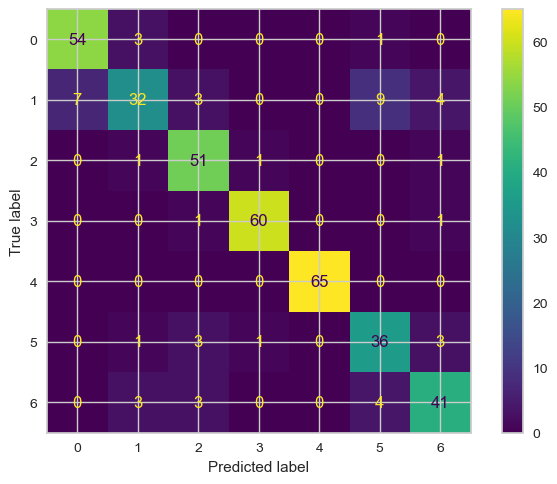

In [497]:
# Compute the confusion matrix
cm = confusion_matrix(y_test2, y_predknn_tuned2, labels=best_knn2.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn2.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Best_Tuned_Feature_Selected_KNN_Confusion_Matrix.png"))
plt.show()

##### Cross Validation Score

In [500]:
cv_scores = cross_val_score(best_knn2, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.75835476 0.90721649 0.90979381 0.90721649 0.93298969]
Mean CV Score: 0.8831142501258844


In [502]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test2,y_predknn_tuned2,'BestTuned_FeatureSelected_KNN_model')

#### C] Support Vector Classifier

In [505]:
from sklearn.svm import SVC

In [507]:
# Define the SVM model
svm = SVC()

In [509]:
# Fit the model
svm.fit(X_train, y_train)

SVC()

In [511]:
# Make predictions on the test set
y_predsvm = svm.predict(X_test)

##### Accuracy

In [514]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_predsvm))

Accuracy: 0.9203084832904884


##### Classification Report

In [517]:
print(classification_report(y_test, y_predsvm))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        58
           1       0.77      0.84      0.80        55
           2       0.98      0.96      0.97        54
           3       0.98      0.98      0.98        62
           4       1.00      1.00      1.00        65
           5       0.83      0.89      0.86        44
           6       0.93      0.84      0.89        51

    accuracy                           0.92       389
   macro avg       0.92      0.92      0.92       389
weighted avg       0.92      0.92      0.92       389



##### Confusion Matrix

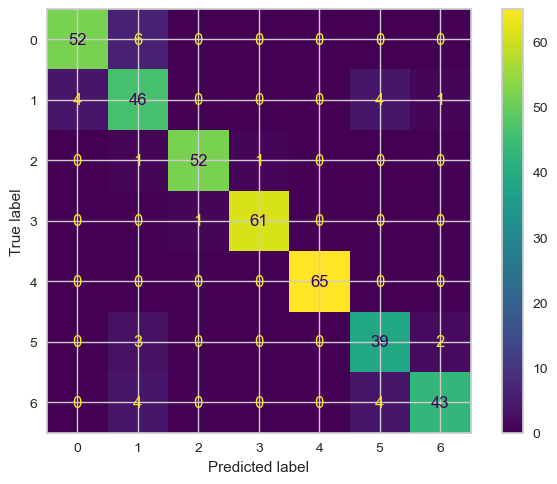

In [520]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predsvm, labels=svm.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Initial_SVM_Confusion_Matrix.png"))
plt.show()

##### Cross Validation Score

In [523]:
cv_scores = cross_val_score(svm, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.72750643 0.94845361 0.94329897 0.93814433 0.95360825]
Mean CV Score: 0.9022023162748788


In [525]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test,y_predsvm,'Initial_SVM_model')

#### Perfroming hyperparameter tuning

In [528]:
# Define the parameter grid for tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for RBF
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Kernel types
}

In [530]:
# Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

In [532]:
# Fit the model
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [534]:
# Get the best parameters and best score
print("Best parameters found by GridSearchCV:")
print(grid_search_svm.best_params_)
print(f"Best accuracy score: {grid_search_svm.best_score_ * 100:.2f}%")


Best parameters found by GridSearchCV:
{'C': 100, 'gamma': 1, 'kernel': 'linear'}
Best accuracy score: 96.78%


In [536]:
# Evaluate the best model on the test set
best_svm = grid_search_svm.best_estimator_
y_predsvm_gs = best_svm.predict(X_test)

##### Accuracy

In [539]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_predsvm_gs))

Accuracy: 0.9665809768637532


##### Classification Report

In [542]:
print(classification_report(y_test, y_predsvm_gs))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.96      0.98      0.97        55
           2       0.98      0.94      0.96        54
           3       0.98      0.98      0.98        62
           4       1.00      1.00      1.00        65
           5       0.93      0.91      0.92        44
           6       0.91      0.94      0.92        51

    accuracy                           0.97       389
   macro avg       0.96      0.96      0.96       389
weighted avg       0.97      0.97      0.97       389



##### Confusion Matrix

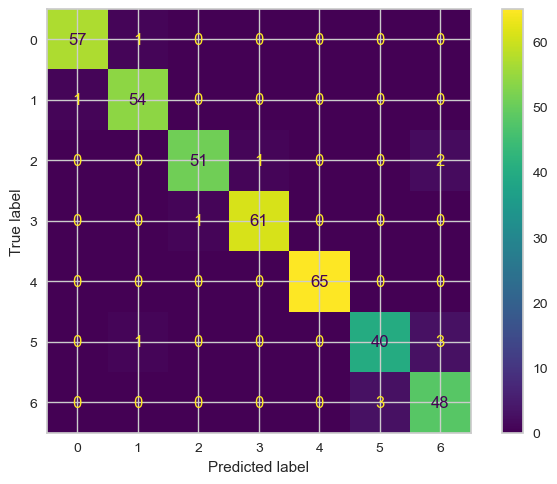

In [545]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predsvm_gs, labels=svm.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Best_Tuned_SVM_Confusion_Matrix.png"))
plt.show()

##### Cross Validation Score

In [548]:
cv_scores = cross_val_score(best_svm, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.89203085 0.96649485 0.98195876 0.98453608 0.98453608]
Mean CV Score: 0.961911324304985


In [550]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test,y_predsvm_gs,'BestTuned_SVM_model')

In [552]:
from sklearn.ensemble import GradientBoostingClassifier

#### D] Gradient Boosting Classifier

In [555]:
# Define the Gradient Boosting model
gb = GradientBoostingClassifier()

In [557]:
# Fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [558]:
# Make predictions on the test set
y_pred_gb = gb.predict(X_test)

##### Accuracy

In [562]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Accuracy: 0.9665809768637532


##### Classification Report

In [565]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.91      0.93      0.92        55
           2       0.96      1.00      0.98        54
           3       1.00      0.97      0.98        62
           4       1.00      1.00      1.00        65
           5       0.87      0.93      0.90        44
           6       1.00      0.96      0.98        51

    accuracy                           0.97       389
   macro avg       0.96      0.96      0.96       389
weighted avg       0.97      0.97      0.97       389



##### Confusion Matrix

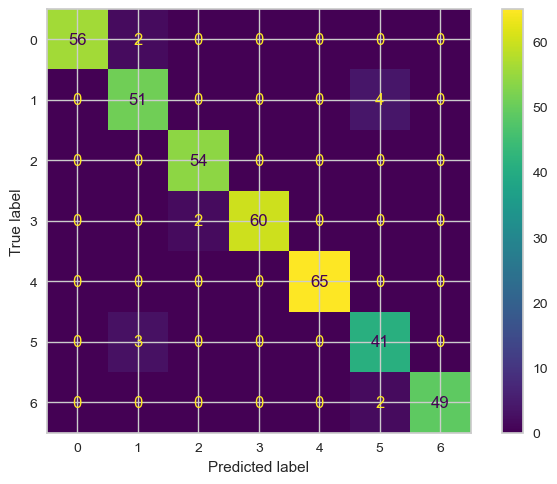

In [568]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb, labels=gb.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "GB_Confusion_Matrix.png"))
plt.show()

##### Cross Validation Score

In [571]:
cv_scores = cross_val_score(gb, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.80719794 0.98195876 0.97938144 0.96907216 0.9742268 ]
Mean CV Score: 0.9423674237404924


In [573]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test,y_pred_gb,'Initial_GB_model')

#### E] AdaBoost Classifier

In [576]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [578]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Stump

In [580]:
# Create the AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [582]:
# Fit the model
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [584]:
# Make predictions on the test set
y_pred_ada = ada_model.predict(X_test)

##### Accuracy

In [587]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred_ada))

Accuracy: 0.33161953727506427


##### Classification Report

In [590]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78        58
           1       0.00      0.00      0.00        55
           2       0.18      0.50      0.27        54
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00        65
           5       0.32      1.00      0.48        44
           6       0.06      0.02      0.03        51

    accuracy                           0.33       389
   macro avg       0.17      0.36      0.22       389
weighted avg       0.17      0.33      0.21       389



##### Confusion Matrix

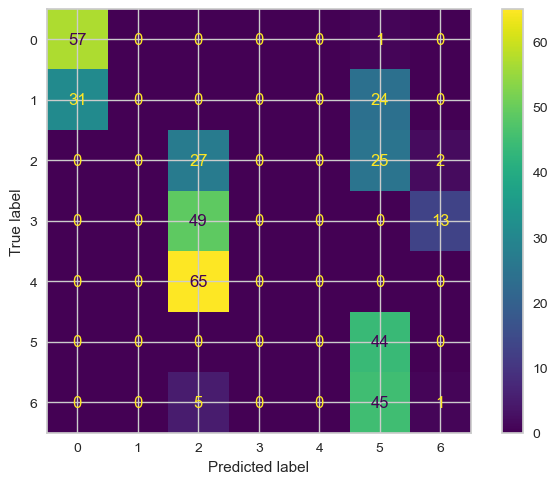

In [593]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_ada, labels=ada_model.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_model.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Initial_ADABoost_Confusion_Matrix.png"))
plt.show()

##### Cross Validation Score

In [596]:
cv_scores = cross_val_score(ada_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.32133676 0.29381443 0.35824742 0.38402062 0.3556701 ]
Mean CV Score: 0.34261786764900753


##### Performing Hyperparameter tuning

In [599]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test,y_pred_ada,'Initial_ADABoost_model')

In [601]:
# Set up the parameter grid
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [603]:
# Create the GridSearchCV object
grid_search_ada = GridSearchCV(AdaBoostClassifier(),
                           param_grid=param_grid_ada,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)


In [605]:
# Fit the GridSearchCV
grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [607]:
# Get the best parameters and best score
print("Best parameters found by GridSearchCV:")
print(grid_search_ada.best_params_)
print(f"Best accuracy score: {grid_search_ada.best_score_ * 100:.2f}%")

Best parameters found by GridSearchCV:
{'learning_rate': 1.0, 'n_estimators': 50}
Best accuracy score: 34.54%


#### F] XGB Classifer

In [610]:
from xgboost import XGBClassifier

In [612]:
# Create the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [614]:
# Fit the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [616]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

##### Accuracy

In [619]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Accuracy: 0.9691516709511568


##### Classification Report

In [622]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.90      0.95      0.92        55
           2       0.96      1.00      0.98        54
           3       1.00      0.98      0.99        62
           4       1.00      1.00      1.00        65
           5       0.91      0.95      0.93        44
           6       1.00      0.96      0.98        51

    accuracy                           0.97       389
   macro avg       0.97      0.97      0.97       389
weighted avg       0.97      0.97      0.97       389



##### Confusion Matrix

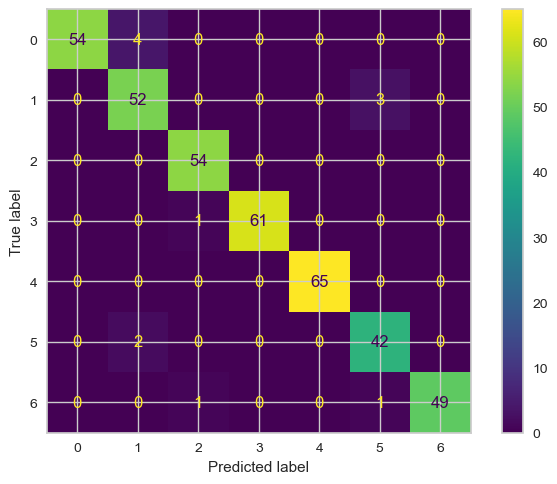

In [625]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Initial_XGBoost_Confusion_Matrix.png"))
plt.show()

##### Cross Validation Score

In [628]:
cv_scores = cross_val_score(xgb_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.83033419 0.98969072 0.98453608 0.99226804 0.98453608]
Mean CV Score: 0.9562730236132829


In [630]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test,y_pred_xgb,'Initial_XGBoost_model')

##### Performing Hyperparameter tuning

In [637]:
# Set up the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [639]:
# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='accuracy', cv=3)

In [641]:
# Fit the GridSearchCV
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [643]:
# Best parameters
print("Best parameters:", grid_search_xgb.best_params_)
print("Best accuracy from grid search:", grid_search_xgb.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best accuracy from grid search: 0.9600631302758963


In [645]:
# Evaluate the best model on the test set
best_xgb = grid_search_xgb.best_estimator_
y_predxgb_gs = best_xgb.predict(X_test)

##### Accuracy

In [648]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_predxgb_gs))

Accuracy: 0.974293059125964


##### Classification Report

In [651]:
print(classification_report(y_test, y_predxgb_gs))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.91      0.95      0.93        55
           2       0.98      1.00      0.99        54
           3       1.00      0.98      0.99        62
           4       1.00      1.00      1.00        65
           5       0.91      0.98      0.95        44
           6       1.00      0.98      0.99        51

    accuracy                           0.97       389
   macro avg       0.97      0.97      0.97       389
weighted avg       0.98      0.97      0.97       389



##### Confusion Matrix

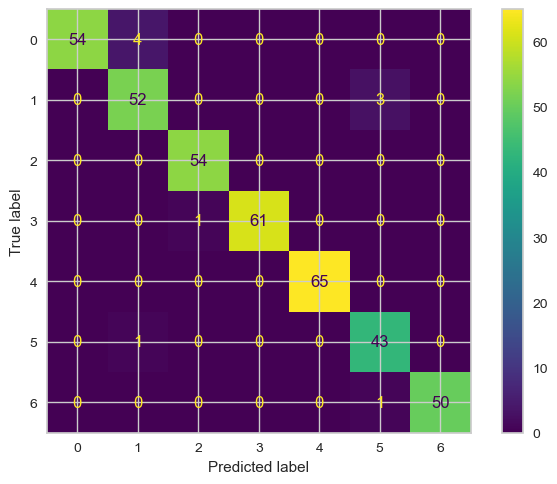

In [654]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predxgb_gs, labels=xgb_model.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Best_Tuned_XGBoost_Confusion_Matrix.png"))
plt.show()

##### Cross Validation Score

In [657]:
cv_scores = cross_val_score(best_xgb, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86632391 0.99226804 0.98969072 0.98453608 0.98195876]
Mean CV Score: 0.9629555031404872


In [659]:
# calling the update score card method to update the score card with this model's score
update_score_card(y_test,y_predxgb_gs,'BestTuned_XGBoost_model')

#### Saving all the models to the models folder

In [662]:
# Define the folder where models will be saved
model_folder = "C:/Users/nikde/Documents/UpGrad/obesityclassprediction/models"

In [664]:
# Save each model with a different name
joblib.dump(rf_model, os.path.join(model_folder, "Initial_RF_model.pkl"))
joblib.dump(rf_model_fs, os.path.join(model_folder, "FaetureSelected_RF_model.pkl"))

joblib.dump(knn, os.path.join(model_folder, "Initial_KNN_model.pkl"))
joblib.dump(best_knn, os.path.join(model_folder, "BestTuned_KNN_model.pkl"))
joblib.dump(knn_model_fs, os.path.join(model_folder, "FeatureSelected_KNN_model.pkl"))
joblib.dump(best_knn2, os.path.join(model_folder, "BestTunedFeatureSelected_KNN_model.pkl"))

joblib.dump(svm, os.path.join(model_folder, "SVC_model.pkl"))
joblib.dump(best_svm, os.path.join(model_folder, "BestTuned_SVC_model.pkl"))

joblib.dump(gb, os.path.join(model_folder, "GB_Boost_model.pkl"))

joblib.dump(ada_model, os.path.join(model_folder, "ADA_Boost_model.pkl"))

joblib.dump(xgb_model, os.path.join(model_folder, "XG_Boost_model.pkl"))
joblib.dump(best_xgb, os.path.join(model_folder, "BestTuned_XG_Boost_model.pkl"))

print("All models saved successfully!")

All models saved successfully!


#### Performance Comparison of all the models

In [671]:
# Sort the score card by accuracy score in descending order
sorted_score_card = score_card.sort_values(by='Accuracy Score', ascending=False).reset_index(drop=True)
sorted_score_card

,model_name,Accuracy Score,Precision Score,Recall Score,f1 Score
0,BestTuned_XGBoost_model,0.974293,0.975447,0.974293,0.974494
1,Initial_XGBoost_model,0.969152,0.970580,0.969152,0.969431
2,BestTuned_SVM_model,0.966581,0.966880,0.966581,0.966613
3,Initial_GB_model,0.966581,0.967979,0.966581,0.966975
4,Initial_RF_model,0.958869,0.960924,0.958869,0.959442
5,FeatureSelected_RF_model,0.951157,0.954569,0.951157,0.951935
6,Initial_SVM_model,0.920308,0.923366,0.920308,0.921154
7,BestTuned_FeatureSelected_KNN_model,0.871465,0.871444,0.871465,0.868111
8,BestTuned_KNN_model,0.866324,0.865136,0.866324,0.860737
9,Initial_KNN_model,0.804627,0.806202,0.804627,0.791949


#### Key Observations:

##### Best Performing Model:

##### BestTuned_XGBoost_model outperforms all other models, achieving:
Accuracy: 97.43%
Precision: 97.54%
Recall: 97.43%
F1 Score: 97.45%
The close alignment between precision, recall, and F1 score indicates balanced performance.

##### Tuning Impact:
###### XGBoost:
Tuning improved the accuracy from 96.92% (Initial_XGBoost_model) to 97.43% (BestTuned_XGBoost_model), showing a clear performance gain.
###### SVM:
Accuracy slightly improved after tuning: from 92.03% (Initial_SVM_model) to 96.66% (BestTuned_SVM_model).
###### KNN:
Tuning boosted accuracy from 80.46% (Initial_KNN_model) to 87.15% (BestTuned_FeatureSelected_KNN_model).

##### Feature Selection Impact:

For Random Forest (FeatureSelected_RF_model), accuracy dropped slightly from 95.88% (Initial_RF_model) to 95.12%.
For KNN, feature selection alone caused a minor decline in performance compared to tuning.
Worst Performing Model:

Initial_ADABoost_model performed poorly across all metrics, with an accuracy of just 33.16% and low precision, recall, and F1 scores. This suggests it is unsuitable for this dataset without further optimization.


In [673]:
# Store the top 5 models into final_score_card
final_score_card = sorted_score_card.head(5)
final_score_card

,model_name,Accuracy Score,Precision Score,Recall Score,f1 Score
0,BestTuned_XGBoost_model,0.974293,0.975447,0.974293,0.974494
1,Initial_XGBoost_model,0.969152,0.970580,0.969152,0.969431
2,BestTuned_SVM_model,0.966581,0.966880,0.966581,0.966613
3,Initial_GB_model,0.966581,0.967979,0.966581,0.966975
4,Initial_RF_model,0.958869,0.960924,0.958869,0.959442


#### Interpreting the Results

##### Best Overall Model:
The BestTuned_XGBoost_model is the most reliable, with the highest accuracy and well-balanced scores, making it suitable for deployment or further evaluation.

##### Potential for Improvement:
While models like BestTuned_SVM_model and Initial_GB_model are competitive, their performance is slightly below that of BestTuned_XGBoost_model. Tuning Gradient Boosting or further feature engineering could yield improvements.

##### Underperforming Models:
Initial_ADABoost_model requires either extensive hyperparameter tuning or reconsideration of its use in this task. It might not be well-suited to the problem's characteristics.

##### KNN Insights:
KNN models have lower overall performance compared to tree-based models, suggesting that the dataset's complexity may not be ideal for a distance-based approach.